<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/KaryTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!apt-get install graphviz libgraphviz-dev
!pip install pygraphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175923 sha256=693983e24a29ddda81fb1424c43f6b14ecd2d9df9d5aaec7587108a47f7e9cad
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz


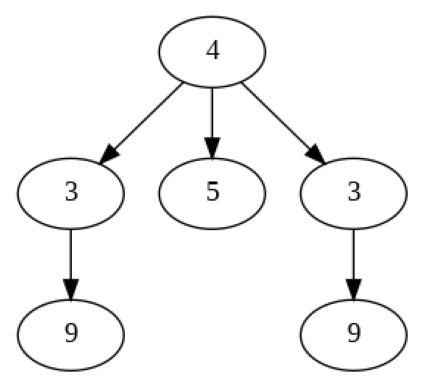

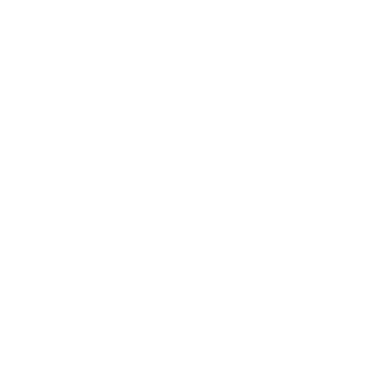

Test Tree 1 is Symmetric: True


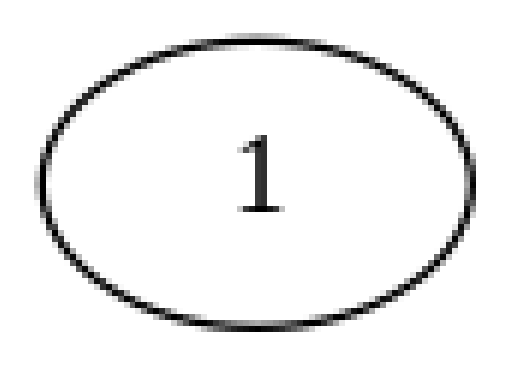

Test Tree 2 is Symmetric: True


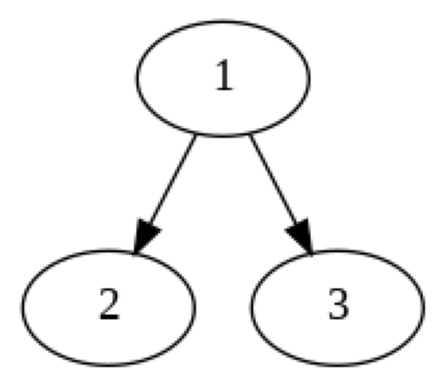

Test Tree 3 is Symmetric: True


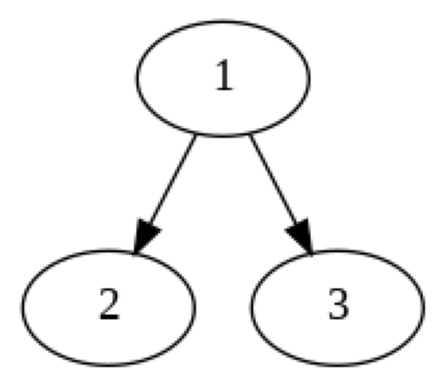

Test Tree 4 is Symmetric: False


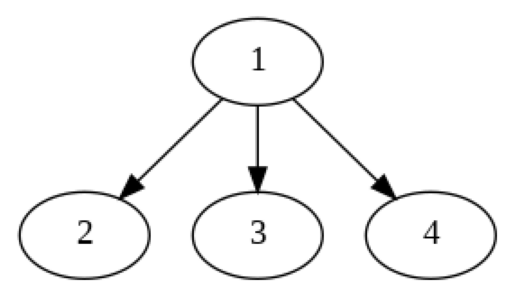

Test Tree 5 is Symmetric: False
Tree 1 (Symmetric: True, Depth: 9):


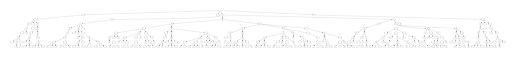

Is Symmetric: False 
--------------------------------------------------
Tree 2 (Symmetric: False, Depth: 8):


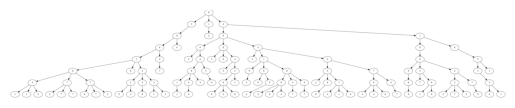

Is Symmetric: False 
--------------------------------------------------
Tree 3 (Symmetric: False, Depth: 8):


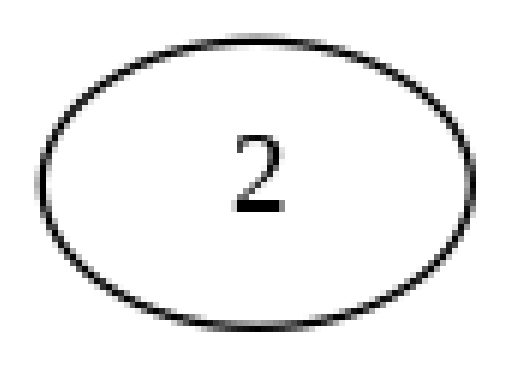

Is Symmetric: True 
--------------------------------------------------
Tree 4 (Symmetric: False, Depth: 1):


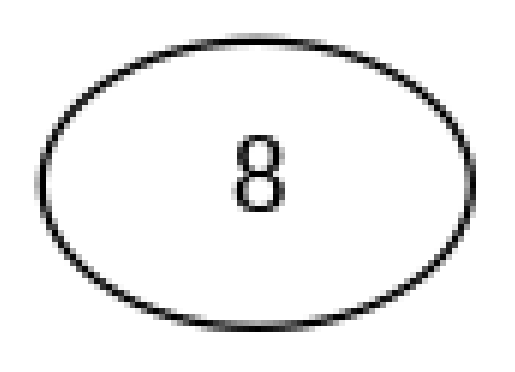

Is Symmetric: True 
--------------------------------------------------
Tree 5 (Symmetric: True, Depth: 10):


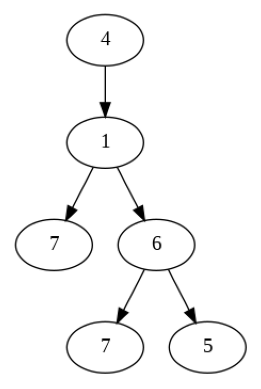

Is Symmetric: False 
--------------------------------------------------
Tree 6 (Symmetric: True, Depth: 7):


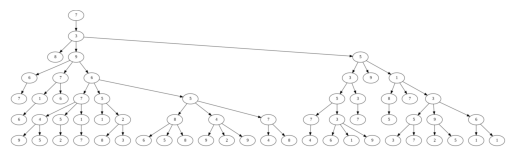

Is Symmetric: False 
--------------------------------------------------
Tree 7 (Symmetric: False, Depth: 3):


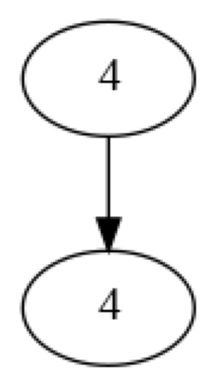

Is Symmetric: True 
--------------------------------------------------
Tree 8 (Symmetric: True, Depth: 2):


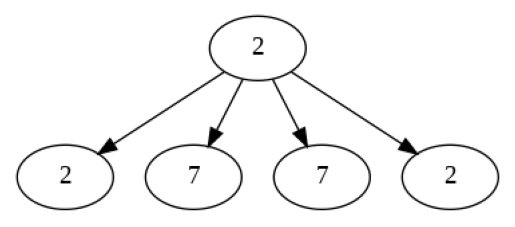

Is Symmetric: True 
--------------------------------------------------
Tree 9 (Symmetric: True, Depth: 10):


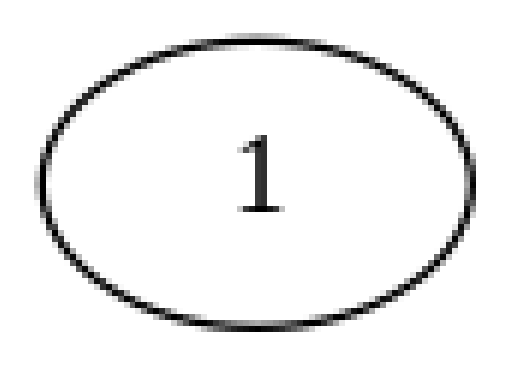

Is Symmetric: True 
--------------------------------------------------
Tree 10 (Symmetric: False, Depth: 2):


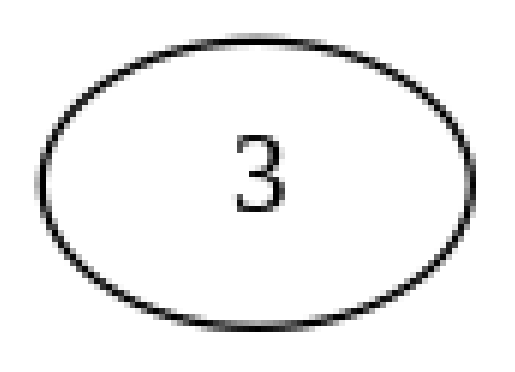

Is Symmetric: True 
--------------------------------------------------


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
import random

# === MODEL === (unchanged)

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

class KaryTree:
    def __init__(self, root=None):
        self.root = root

    def is_symmetric(self):
        def is_mirror(left, right):
            if not left and not right:
                return True
            if not left or not right:
                return False
            if left.value != right.value:
                return False
            if len(left.children) != len(right.children):
                return False
            n = len(left.children)
            for i in range(n):
                if not is_mirror(left.children[i], right.children[n - i - 1]):
                    return False
            return True
        if not self.root:
            return True
        return is_mirror(self.root, self.root)


# === VIEW ===
def display_tree_pygraphviz(tree):
    """
    Displays the k-ary tree using pygraphviz.

    Attributes:
    - tree (KaryTree): The k-ary tree to be displayed.

    Returns:
    - None
    """
    A = pgv.AGraph(directed=True, strict=True, rankdir='TD')

    def add_nodes_edges(node, parent=None):
        if not node:
            return
        A.add_node(node.value)
        if parent:
            A.add_edge(parent.value, node.value)
        for child in node.children:
            add_nodes_edges(child, node)

    add_nodes_edges(tree.root)
    A.layout(prog='dot')
    A.draw('tree.png', prog='dot', format='png')
    plt.imshow(plt.imread('tree.png'))
    plt.axis('off')
    plt.show()

def display_tree_ascii(tree):
    """
    Displays the k-ary tree using a 2D buffer as ASCII art.

    Attributes:
    - tree (KaryTree): The k-ary tree to be displayed.

    Returns:
    - None
    """
    buffer = [[' ' for _ in range(100)] for _ in range(40)]

    def fill_buffer(node, x, y, layer):
        if not node:
            return
        buffer[y][x] = str(node.value)
        num_children = len(node.children)
        for idx, child in enumerate(node.children):
            new_x = x + (idx - num_children // 2) * (10 // (layer + 1))
            new_y = y + 3
            buffer[new_y - 1][new_x] = '|'
            fill_buffer(child, new_x, new_y, layer + 1)

    fill_buffer(tree.root, 50, 0, 0)

    # Print the buffer as ASCII art
    for row in buffer:
        print("".join(row))

def display_tree_graphically(tree):
    """
    Displays the k-ary tree graphically using networkx and matplotlib.

    Attributes:
    - tree (KaryTree): The k-ary tree to be displayed.

    Returns:
    - None
    """
    G = nx.DiGraph()

    def add_nodes_edges(node, parent=None):
        if not node:
            return
        G.add_node(node.value)
        if parent:
            G.add_edge(parent.value, node.value)
        for child in node.children:
            add_nodes_edges(child, node)

    add_nodes_edges(tree.root)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue')
    plt.show()

def display_tree_with_unique_ids(tree):
    """
    Displays the k-ary tree using pygraphviz with unique node IDs.

    Attributes:
    - tree (KaryTree): The k-ary tree to be displayed.

    Returns:
    - None
    """
    A = pgv.AGraph(directed=True, strict=True, rankdir='TD')
    node_id = 0

    def add_nodes_edges(node, parent_id=None):
        nonlocal node_id
        if not node:
            return
        curr_id = node_id
        A.add_node(curr_id, label=str(node.value))
        node_id += 1

        if parent_id is not None:
            A.add_edge(parent_id, curr_id)

        for child in node.children:
            add_nodes_edges(child, curr_id)

    add_nodes_edges(tree.root)
    A.layout(prog='dot')
    A.draw('tree_with_unique_ids.png', prog='dot', format='png')
    plt.imshow(plt.imread('tree_with_unique_ids.png'))
    plt.axis('off')
    plt.show()


# === CONTROLLER === (unchanged)

def is_tree_symmetric(tree):
#    display_tree_ascii(tree)
#    display_tree_graphically(tree)
    display_tree_pygraphviz(tree)
    return tree.is_symmetric()

def generate_random_tree(depth=1, symmetric=False):
    """
    Generates a random k-ary tree.

    Parameters:
    - depth (int): Maximum depth of the tree.
    - symmetric (bool): If True, generates a symmetric tree.

    Returns:
    - KaryTree: A randomly generated k-ary tree.
    """
    def generate_subtree(node, current_depth):
        # Base cases
        if current_depth == depth:
            return
        num_children = random.randint(0, 3)  # Random number of children (can be adjusted)
        for _ in range(num_children):
            child_value = random.randint(1, 9)  # Random node value between 1 to 9
            child = TreeNode(child_value)
            node.children.append(child)
            generate_subtree(child, current_depth + 1)

    # Start generating the tree
    root_value = random.randint(1, 9)
    root = TreeNode(root_value)
    if symmetric:
        # Generate half of the tree and mirror it
        half_depth = (depth // 2) + (depth % 2)  # Ceiling division
        generate_subtree(root, 1)
        # Mirror the tree
        if len(root.children) > 1:
            left, right = root.children[0], TreeNode(root.children[0].value)
            root.children.append(right)
            mirror_subtrees(left, right)
    else:
        # Generate a completely random tree
        generate_subtree(root, 1)

    return KaryTree(root)


def mirror_subtrees(source, target):
    """
    Makes the target subtree a mirror image of the source subtree.

    Parameters:
    - source (TreeNode): The source subtree.
    - target (TreeNode): The target subtree to be made a mirror.

    Returns:
    - None
    """
    for child in source.children:
        mirrored_child = TreeNode(child.value)
        target.children.insert(0, mirrored_child)
        mirror_subtrees(child, mirrored_child)

# === TESTING ===
root = TreeNode(4)
root.children = [TreeNode(3), TreeNode(5), TreeNode(3)]
root.children[0].children = [TreeNode(9)]
root.children[2].children = [TreeNode(9)]

sample_tree = KaryTree(root)

display_tree_with_unique_ids(sample_tree)

# print("Sample Tree is Symmetric:", is_tree_symmetric(sample_tree))

def test_function():
    test_trees = [
        KaryTree(),
        KaryTree(TreeNode(1)),
        KaryTree(TreeNode(1)),
        KaryTree(TreeNode(1)),
        KaryTree(TreeNode(1))
    ]
    test_trees[2].root.children = [TreeNode(2), TreeNode(3), TreeNode(2)]
    test_trees[3].root.children = [TreeNode(2), TreeNode(3)]
    test_trees[4].root.children = [TreeNode(2), TreeNode(3), TreeNode(4)]

    for i, tree in enumerate(test_trees, 1):
        print(f"Test Tree {i} is Symmetric:", is_tree_symmetric(tree))

def test_random_trees_with_unique_ids(num_trees=10):
    """
    Tests and displays random k-ary trees using the unique ID visualization method.

    Parameters:
    - num_trees (int): Number of random trees to generate and test.

    Returns:
    - None
    """
    for i in range(num_trees):
        is_symmetric = bool(random.getrandbits(1))  # Randomly choose if the tree should be symmetric
        tree_depth = random.randint(1, 10)  # Random depth up to 10
        tree = generate_random_tree(tree_depth, is_symmetric)

        print(f"Tree {i + 1} (Symmetric: {is_symmetric}, Depth: {tree_depth}):")
        display_tree_with_unique_ids(tree)  # Display the tree using the unique ID method
        result = tree.is_symmetric()  # Check if the tree is symmetric
        print(f"Is Symmetric: {result}", "\n" + "-" * 50)


def test_random_trees_with_higher_symmetry(num_trees=10, symmetry_probability=0.8):
    """
    Tests and displays random k-ary trees with a higher probability of them being symmetric.

    Parameters:
    - num_trees (int): Number of random trees to generate and test.
    - symmetry_probability (float): Probability for a tree to be symmetric.

    Returns:
    - None
    """
    for i in range(num_trees):
        is_symmetric = random.random() < symmetry_probability  # Decide if the tree should be symmetric based on the probability
        tree_depth = random.randint(1, 10)  # Random depth up to 10
        tree = generate_random_tree(tree_depth, is_symmetric)

        print(f"Tree {i + 1} (Symmetric: {is_symmetric}, Depth: {tree_depth}):")
        display_tree_with_unique_ids(tree)  # Display the tree using the unique ID method
        result = tree.is_symmetric()  # Check if the tree is symmetric
        print(f"Is Symmetric: {result}", "\n" + "-" * 50)


test_function()
#test_random_trees_with_unique_ids()
test_random_trees_with_higher_symmetry()